In [1]:
# Imports + paths

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

PROJECT = Path.cwd()
PROCESSED = PROJECT / "data" / "processed"


In [2]:
# Load data

prot = pd.read_csv(PROCESSED / "proteomics_qc_imputed.csv", index_col=0)
rna  = pd.read_csv(PROCESSED / "rna_filtered_imputed.csv", index_col=0)
clin = pd.read_csv(PROCESSED / "clinical_aligned.csv", index_col=0)

# align samples across all 3
common = prot.index.intersection(rna.index).intersection(clin.index)
prot = prot.loc[common]
rna  = rna.loc[common]
clin = clin.loc[common]

print("samples:", len(common))
print("prot:", prot.shape, "rna:", rna.shape, "clin:", clin.shape)


samples: 95
prot: (95, 9491) rna: (95, 54055) clin: (95, 124)


In [3]:
# PCA on the concatenated matrix

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = pd.concat([prot, rna], axis=1)
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=10, random_state=1)
PC = pca.fit_transform(X_scaled)

pcs = pd.DataFrame(PC, index=X.index, columns=[f"PC{i}" for i in range(1, 11)])
pcs.head(2)



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
C3L-00006,104.145266,31.842243,-46.245497,34.293864,-22.681333,-38.532082,42.342490,-1.487984,47.183901,28.551092
C3L-00008,204.188440,41.508019,-95.447442,54.024920,34.392142,-79.295803,13.680138,-20.923570,-10.512343,-73.012455


In [21]:
list(clin.columns) [:40]

batch_words = ["batch", "plate", "run", "center", "site", "institution", "lab", "source", "aliquot", "tmt", "channel"]
[c for c in clin.columns if any(w in c.lower() for w in batch_words)]



['tumor_site',
 'tumor_site_other',
 'specify_distant_metastasis_documented_sites',
 'history_source',
 'history_source.1',
 'history_source.2',
 'site_of_new_tumor',
 'other_site_of_new_tumor']

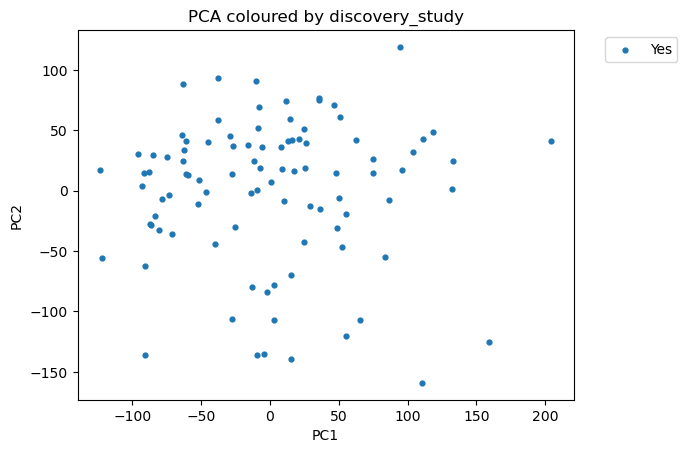

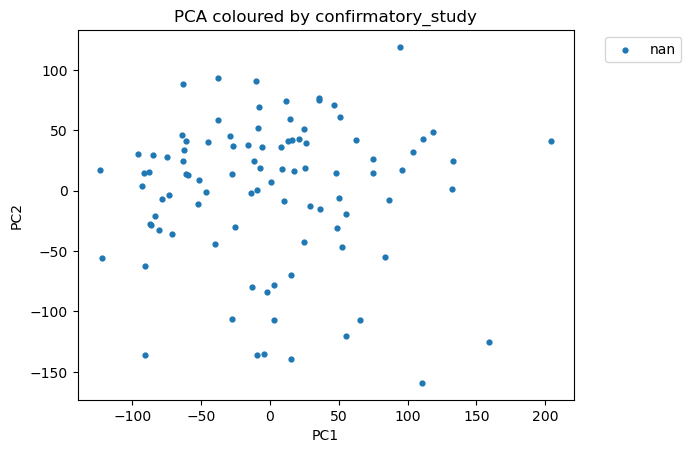

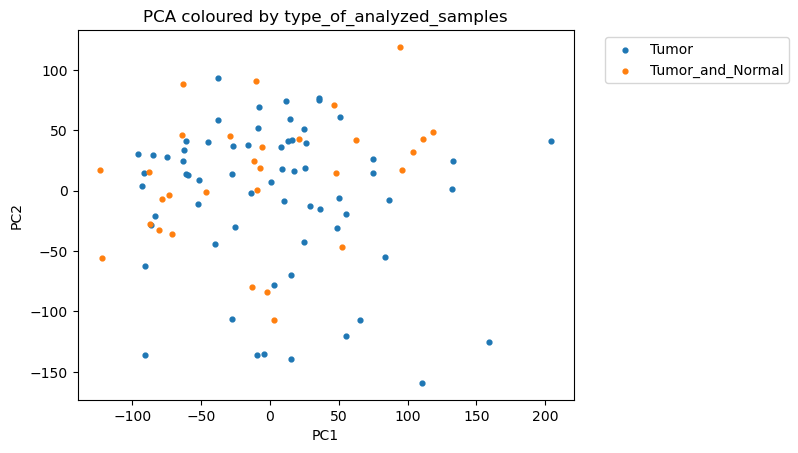

In [22]:
# PCA plotting helper

import matplotlib.pyplot as plt

def pca_colour(pcs, clin, col):
    s = clin[col].astype(str)
    plt.figure()
    for label in sorted(s.unique()):
        idx = (s == label).values
        plt.scatter(pcs.loc[idx, "PC1"], pcs.loc[idx, "PC2"], label=label, s=12)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title(f"PCA coloured by {col}")
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.show()


pca_colour(pcs, clin, "discovery_study")
pca_colour(pcs, clin, "confirmatory_study")
pca_colour(pcs, clin, "type_of_analyzed_samples")

